In [1]:
import os
import sys

import paddle
import paddle.nn as nn
import numpy as np

import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.preprocessing import MinMaxScaler
from pandas.plotting import register_matplotlib_converters

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../..")))
from paddlenlp.seq2vec import TCNEncoder

import paddlenlp

C:\anaconda\lib\site-packages\pandas\compat\numpy\__init__.py:10: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  _nlv = LooseVersion(_np_version)
C:\anaconda\lib\site-packages\pandas\compat\numpy\__init__.py:11: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  _np_version_under1p16 = _nlv < LooseVersion("1.16")
C:\anaconda\lib\site-packages\pandas\compat\numpy\__init__.py:12: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  _np_version_under1p17 = _nlv < LooseVersion("1.17")
C:\anaconda\lib\site-packages\pandas\compat\numpy\__init__.py:13: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  _np_version_under1p18 = _nlv < LooseVersion("1.18")
C:\anaconda\lib\site-packages\pandas\compat\numpy\__init__.py:14: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  _np_ve

In [2]:
# config matplotlib
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#93D30C", "#8F00FF","#000000","#949494"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 14, 10
register_matplotlib_converters()

In [16]:
# import requests
# url = '''https://raw.githubusercontent.com/CSSEGISandData/
#         COVID-19/master/csse_covid_19_data/
#         csse_covid_19_time_series/
#         time_series_covid19_confirmed_global.csv'''
# res = requests.get(url, allow_redirects=True)
# with open('cases.csv','wb') as file:
#     file.write(res.content)
    
df_all = pd.read_csv('cases.csv')
df_all.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/5/22,5/6/22,5/7/22,5/8/22,5/9/22,5/10/22,5/11/22,5/12/22,5/13/22,5/14/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,178905,178919,178922,178981,179010,179017,179131,179169,179203,179242
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,275266,275310,275341,275366,275372,275416,275440,275485,275534,275574
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265786,265791,265794,265798,265800,265804,265806,265808,265814,265816
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,41717,41717,41717,41717,41717,41717,41717,42156,42156,42156
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,99287,99287,99287,99287,99287,99287,99287,99287,99287,99287


In [17]:
df = df_all.iloc[:, 4:]
daily_cases = df.sum(axis=0)
daily_cases.index = pd.to_datetime(daily_cases.index)
daily_cases.head()

2020-01-22     557
2020-01-23     657
2020-01-24     944
2020-01-25    1437
2020-01-26    2120
dtype: int64

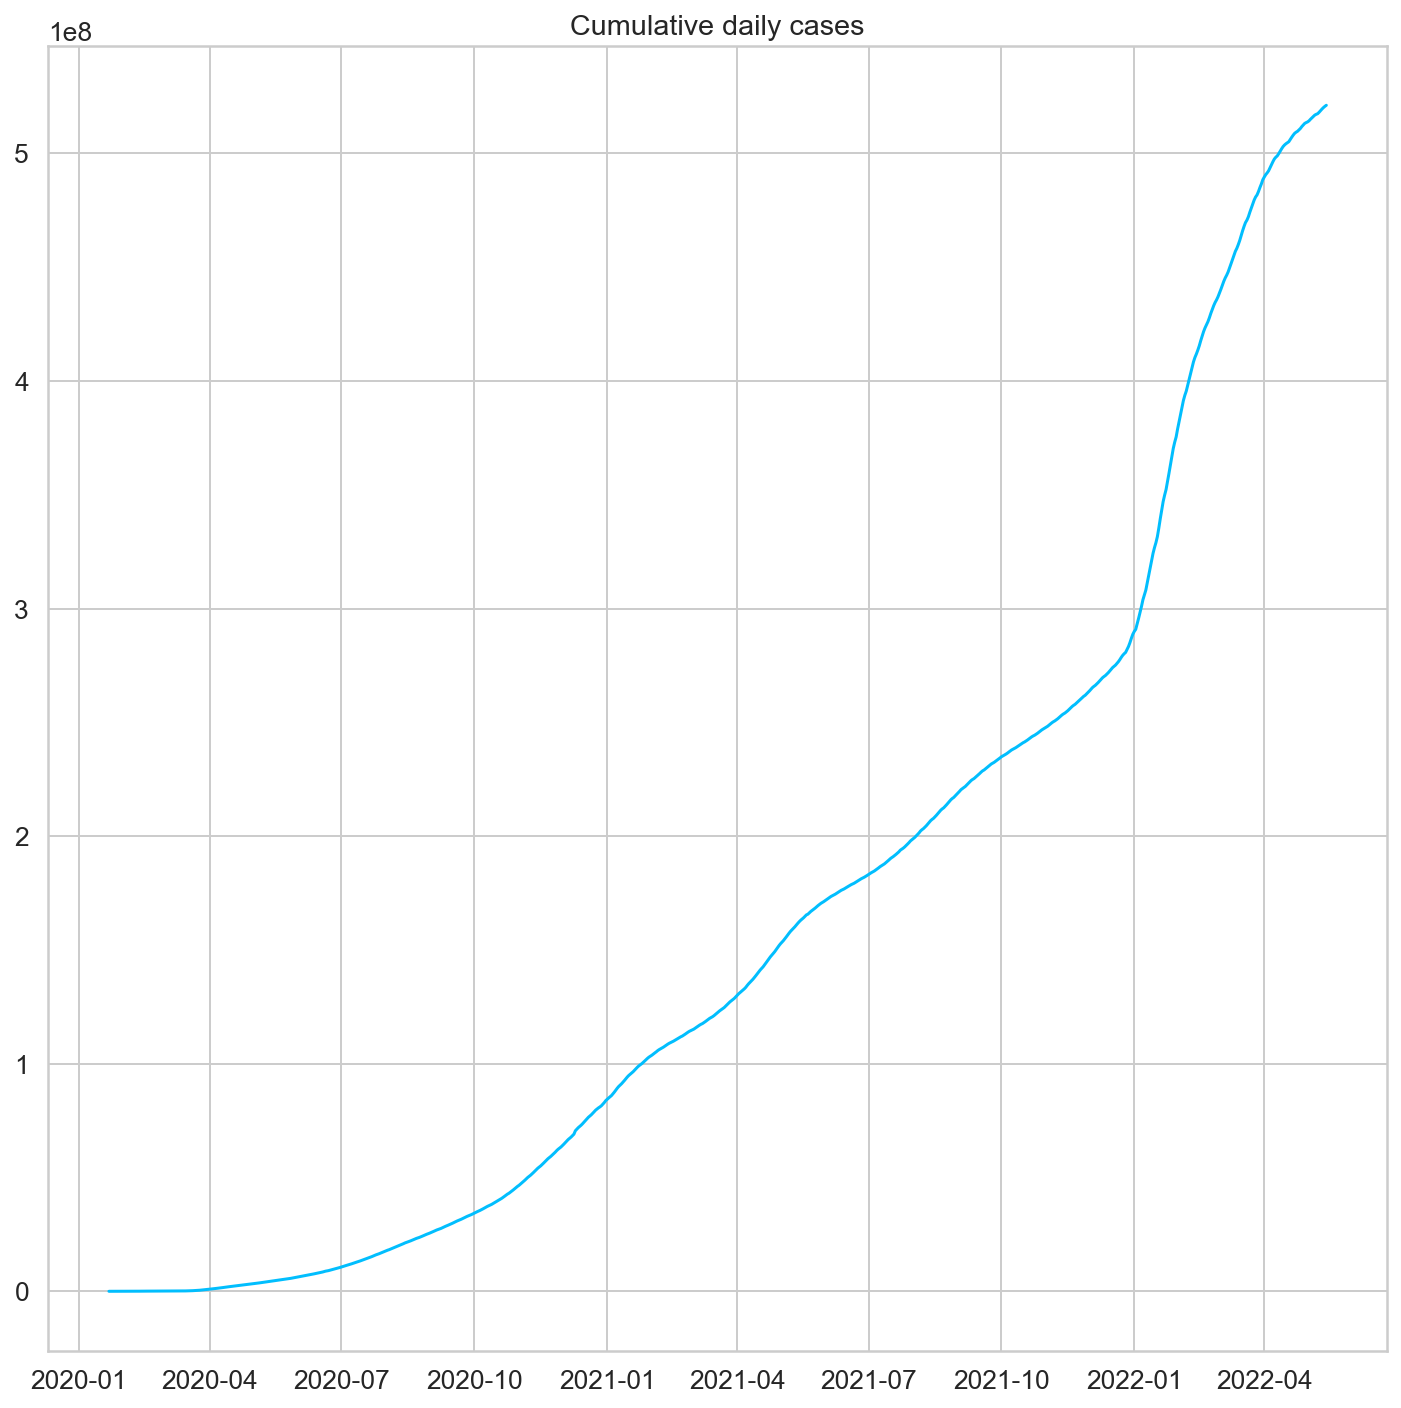

In [18]:
plt.figure(figsize=(12,12))
plt.plot(daily_cases)
plt.title("Cumulative daily cases");

In [19]:
df_country=df_all.set_index('Country/Region')
df_country

,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,5/5/22,5/6/22,5/7/22,5/8/22,5/9/22,5/10/22,5/11/22,5/12/22,5/13/22,5/14/22
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,33.939110,67.709953,0,0,0,0,0,0,0,...,178905,178919,178922,178981,179010,179017,179131,179169,179203,179242
Albania,NaN,41.153300,20.168300,0,0,0,0,0,0,0,...,275266,275310,275341,275366,275372,275416,275440,275485,275534,275574
Algeria,NaN,28.033900,1.659600,0,0,0,0,0,0,0,...,265786,265791,265794,265798,265800,265804,265806,265808,265814,265816
Andorra,NaN,42.506300,1.521800,0,0,0,0,0,0,0,...,41717,41717,41717,41717,41717,41717,41717,42156,42156,42156
Angola,NaN,-11.202700,17.873900,0,0,0,0,0,0,0,...,99287,99287,99287,99287,99287,99287,99287,99287,99287,99287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,NaN,31.952200,35.233200,0,0,0,0,0,0,0,...,657060,657060,657060,657060,657193,657193,657193,657193,657193,657193
Winter Olympics 2022,NaN,39.904200,116.407400,0,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
Yemen,NaN,15.552727,48.516388,0,0,0,0,0,0,0,...,11819,11819,11819,11819,11819,11819,11819,11819,11819,11819


In [20]:
daily_cases_China = df_country.loc['China':'China']
daily_cases_China=daily_cases_China.set_index('Province/State').loc['Unknown':'Unknown'].iloc[:,2:]
daily_cases_China=daily_cases_China.rename(index={'Unknown':'China'})
daily_cases_China.to_csv("daily_cases/daily_cases_China.csv", index_label='Country/Region')

In [21]:
daily_cases_India = df_country.loc['India':'India'].iloc[:,3:]
daily_cases_India
daily_cases_India.to_csv("daily_cases/daily_cases_India.csv")

In [22]:
daily_cases_Iran = df_country.loc['Iran':'Iran'].iloc[:,3:]
daily_cases_Iran.to_csv("daily_cases/daily_cases_Iran.csv")

In [23]:
daily_cases_Japan = df_country.loc['Japan':'Japan'].iloc[:,3:]
daily_cases_Japan.to_csv("daily_cases/daily_cases_Japan.csv")

In [24]:
daily_cases_Korea = df_country.loc['Korea, South':'Korea, South'].iloc[:,3:]
daily_cases_Korea.to_csv("daily_cases/daily_cases_Korea.csv")

In [25]:
daily_cases_Russia = df_country.loc['Russia':'Russia'].iloc[:,3:]
daily_cases_Russia.to_csv("daily_cases/daily_cases_Russia.csv")

In [26]:
daily_cases_Turkey = df_country.loc['Turkey':'Turkey'].iloc[:,3:]
daily_cases_Turkey.to_csv("daily_cases/daily_cases_Turkey.csv")

In [27]:
daily_cases_Vietnam = df_country.loc['Vietnam':'Vietnam'].iloc[:,3:]
daily_cases_Vietnam.to_csv("daily_cases/daily_cases_Vietnam.csv")

In [28]:
daily_cases_China = pd.read_csv('daily_cases/daily_cases_China.csv').iloc[:,1:]
daily_cases_China=daily_cases_China.sum(axis=0)
daily_cases_China.index=pd.to_datetime(daily_cases_China.index)
# plt.figure(figsize=(12,12))
# plt.plot(daily_cases_China)
# plt.title("Cumulative daily cases of China");

In [29]:
daily_cases_India = pd.read_csv('daily_cases/daily_cases_India.csv').iloc[:,1:]
daily_cases_India=daily_cases_India.sum(axis=0)
daily_cases_India.index=pd.to_datetime(daily_cases_India.index)
# plt.figure(figsize=(12,12))
# plt.plot(daily_cases_India)
# plt.title("Cumulative daily cases of India");

In [30]:
daily_cases_Iran = pd.read_csv('daily_cases/daily_cases_Iran.csv').iloc[:,1:]
daily_cases_Iran_=daily_cases_Iran.sum(axis=0)
daily_cases_Iran_.index=pd.to_datetime(daily_cases_Iran_.index)
# plt.figure(figsize=(12,12))
# plt.plot(daily_cases_Iran_)
# plt.title("Cumulative daily cases of Iran");

In [31]:
daily_cases_Japan = pd.read_csv('daily_cases/daily_cases_Japan.csv').iloc[:,1:]
daily_cases_Japan_=daily_cases_Japan.sum(axis=0)
daily_cases_Japan_.index=pd.to_datetime(daily_cases_Japan_.index)
# plt.figure(figsize=(12,12))
# plt.plot(daily_cases_Japan_)
# plt.title("Cumulative daily cases of Japan");

In [32]:
daily_cases_Korea = pd.read_csv('daily_cases/daily_cases_Korea.csv').iloc[:,1:]
daily_cases_Korea=daily_cases_Korea.sum(axis=0)
daily_cases_Korea.index=pd.to_datetime(daily_cases_Korea.index)
# plt.figure(figsize=(12,12))
# plt.plot(daily_cases_Korea)
# plt.title("Cumulative daily cases of Korea");

In [33]:
daily_cases_Russia = pd.read_csv('daily_cases/daily_cases_Russia.csv').iloc[:,1:]
daily_cases_Russia=daily_cases_Russia.sum(axis=0)
daily_cases_Russia.index=pd.to_datetime(daily_cases_Russia.index)
# plt.figure(figsize=(12,12))
# plt.plot(daily_cases_Russia)
# plt.title("Cumulative daily cases of Russia");

In [34]:
daily_cases_Turkey = pd.read_csv('daily_cases/daily_cases_Turkey.csv').iloc[:,1:]
daily_cases_Turkey=daily_cases_Turkey.sum(axis=0)
daily_cases_Turkey.index=pd.to_datetime(daily_cases_Turkey.index)
# plt.figure(figsize=(12,12))
# plt.plot(daily_cases_Turkey)
# plt.title("Cumulative daily cases of Turkey");

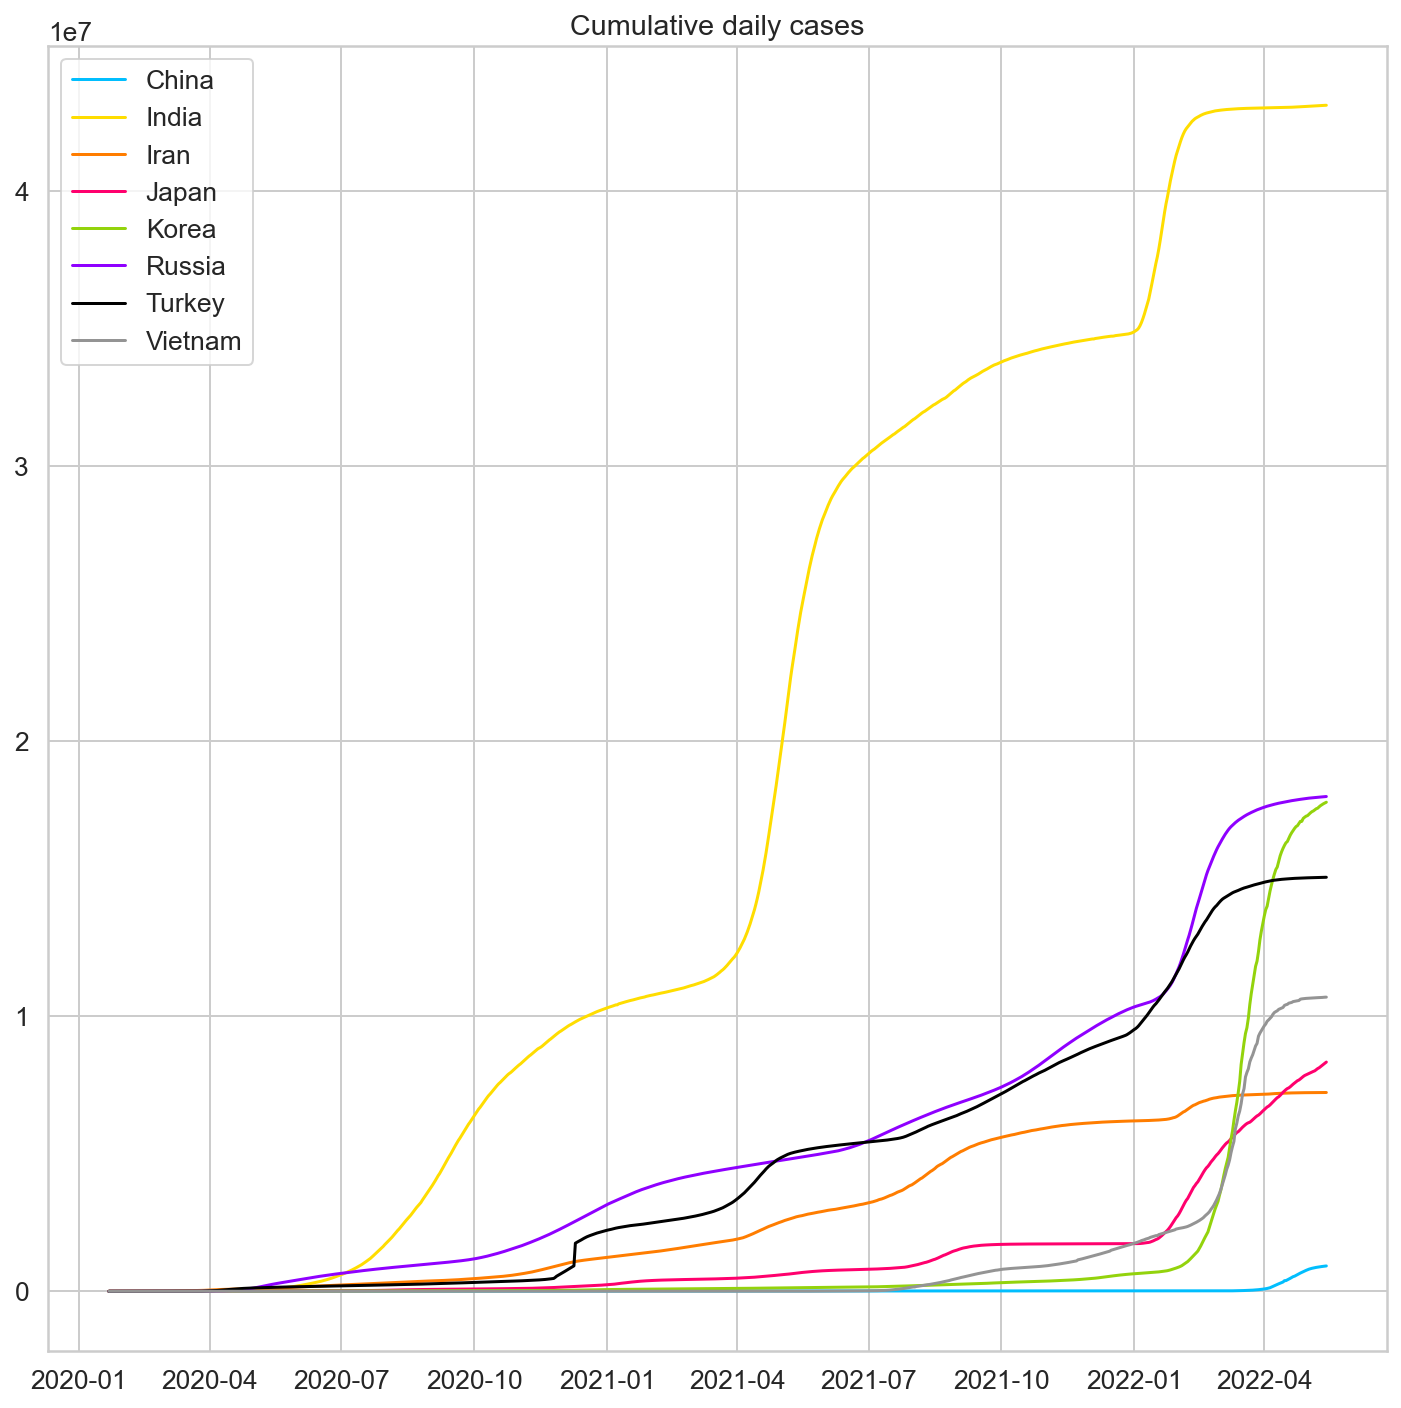

In [35]:
daily_cases_Vietnam = pd.read_csv('daily_cases/daily_cases_Vietnam.csv').iloc[:,1:]
daily_cases_Vietnam=daily_cases_Vietnam.sum(axis=0)
daily_cases_Vietnam.index=pd.to_datetime(daily_cases_Vietnam.index)
plt.figure(figsize=(12,12))
plt.plot(daily_cases_China,label='China')
plt.plot(daily_cases_India,label='India')
plt.plot(daily_cases_Iran_,label='Iran')
plt.plot(daily_cases_Japan_,label='Japan')
plt.plot(daily_cases_Korea,label='Korea')
plt.plot(daily_cases_Russia,label='Russia')
plt.plot(daily_cases_Turkey,label='Turkey')
plt.plot(daily_cases_Vietnam,label='Vietnam')
plt.title("Cumulative daily cases")

plt.legend();

In [93]:
daily_cases_China = pd.read_csv('daily_cases/daily_cases_China.csv').set_index('Country/Region').diff(axis=1).iloc[:,1:]
daily_cases_India = pd.read_csv('daily_cases/daily_cases_India.csv').set_index('Country/Region').diff(axis=1).iloc[:,1:]
daily_cases_Iran = pd.read_csv('daily_cases/daily_cases_Iran.csv').set_index('Country/Region').diff(axis=1).iloc[:,1:]
daily_cases_Japan = pd.read_csv('daily_cases/daily_cases_Japan.csv').set_index('Country/Region').diff(axis=1).iloc[:,1:]
daily_cases_Korea = pd.read_csv('daily_cases/daily_cases_Korea.csv').set_index('Country/Region').diff(axis=1).iloc[:,1:]
daily_cases_Russia = pd.read_csv('daily_cases/daily_cases_Russia.csv').set_index('Country/Region').diff(axis=1).iloc[:,1:]
daily_cases_Turkey = pd.read_csv('daily_cases/daily_cases_Turkey.csv').set_index('Country/Region').diff(axis=1).iloc[:,1:]
daily_cases_Vietnam = pd.read_csv('daily_cases/daily_cases_Vietnam.csv').set_index('Country/Region').diff(axis=1).iloc[:,1:]

In [94]:
daily_cases_China[daily_cases_China < 0] = 0

In [95]:
daily_cases_China.to_csv("new_daily_cases/new_daily_cases_China.csv", index_label='Country/Region')
daily_cases_India.to_csv("new_daily_cases/new_daily_cases_India.csv", index_label='Country/Region')
daily_cases_Iran.to_csv("new_daily_cases/new_daily_cases_Iran.csv", index_label='Country/Region')
daily_cases_Japan.to_csv("new_daily_cases/new_daily_cases_Japan.csv", index_label='Country/Region')
daily_cases_Korea.to_csv("new_daily_cases/new_daily_cases_Korea.csv", index_label='Country/Region')
daily_cases_Russia.to_csv("new_daily_cases/new_daily_cases_Russia.csv", index_label='Country/Region')
daily_cases_Turkey.to_csv("new_daily_cases/new_daily_cases_Turkey.csv", index_label='Country/Region')
daily_cases_Vietnam.to_csv("new_daily_cases/new_daily_cases_Vietnam.csv", index_label='Country/Region')

In [96]:
daily_cases_China = pd.read_csv('new_daily_cases/new_daily_cases_China.csv').set_index('Country/Region')
daily_cases_India = pd.read_csv('new_daily_cases/new_daily_cases_India.csv').set_index('Country/Region')
daily_cases_Iran = pd.read_csv('new_daily_cases/new_daily_cases_Iran.csv').set_index('Country/Region')
daily_cases_Japan = pd.read_csv('new_daily_cases/new_daily_cases_Japan.csv').set_index('Country/Region')
daily_cases_Korea = pd.read_csv('new_daily_cases/new_daily_cases_Korea.csv').set_index('Country/Region')
daily_cases_Russia = pd.read_csv('new_daily_cases/new_daily_cases_Russia.csv').set_index('Country/Region')
daily_cases_Turkey = pd.read_csv('new_daily_cases/new_daily_cases_Turkey.csv').set_index('Country/Region')
daily_cases_Vietnam = pd.read_csv('new_daily_cases/new_daily_cases_Vietnam.csv').set_index('Country/Region')

In [97]:
summary_dataset=pd.DataFrame(
    {
        'Country':['China','India','Iran','Japan','Korea','Russia','Turkey','Vietnam'],
        
        'Min':[format(round(float(daily_cases_China.min(axis=1)), 2),','),
               format(round(float(daily_cases_India.min(axis=1)), 2),','),
               format(round(float(daily_cases_Iran.min(axis=1)), 2),','),
               format(round(float(daily_cases_Japan.min(axis=1)), 2),','),
               format(round(float(daily_cases_Korea.min(axis=1)), 2),','),
               format(round(float(daily_cases_Russia.min(axis=1)), 2),','),
               format(round(float(daily_cases_Turkey.min(axis=1)), 2),','),
               format(round(float(daily_cases_Vietnam.min(axis=1)), 2),',')
              ],

        'Max':[format(round(float(daily_cases_China.max(axis=1)), 2),','),
               format(round(float(daily_cases_India.max(axis=1)), 2),','),
               format(round(float(daily_cases_Iran.max(axis=1)), 2),','),
               format(round(float(daily_cases_Japan.max(axis=1)), 2),','),
               format(round(float(daily_cases_Korea.max(axis=1)), 2),','),
               format(round(float(daily_cases_Russia.max(axis=1)), 2),','),
               format(round(float(daily_cases_Turkey.max(axis=1)), 2),','),
               format(round(float(daily_cases_Vietnam.max(axis=1)), 2),',')
              ],
        
        'Mean':[format(round(float(daily_cases_China.mean(axis=1)), 2),','),
               format(round(float(daily_cases_India.mean(axis=1)), 2),','),
               format(round(float(daily_cases_Iran.mean(axis=1)), 2),','),
               format(round(float(daily_cases_Japan.mean(axis=1)), 2),','),
               format(round(float(daily_cases_Korea.mean(axis=1)), 2),','),
               format(round(float(daily_cases_Russia.mean(axis=1)), 2),','),
               format(round(float(daily_cases_Turkey.mean(axis=1)), 2),','),
               format(round(float(daily_cases_Vietnam.mean(axis=1)), 2),',')
               ],
        
        'Median':[format(round(float(daily_cases_China.median(axis=1)), 2),','),
               format(round(float(daily_cases_India.median(axis=1)), 2),','),
               format(round(float(daily_cases_Iran.median(axis=1)), 2),','),
               format(round(float(daily_cases_Japan.median(axis=1)), 2),','),
               format(round(float(daily_cases_Korea.median(axis=1)), 2),','),
               format(round(float(daily_cases_Russia.median(axis=1)), 2),','),
               format(round(float(daily_cases_Turkey.median(axis=1)), 2),','),
               format(round(float(daily_cases_Vietnam.median(axis=1)), 2),',')
                 ],
        
        'Std':[format(round(float(daily_cases_China.std(axis=1)), 2),','),
               format(round(float(daily_cases_India.std(axis=1)), 2),','),
               format(round(float(daily_cases_Iran.std(axis=1)), 2),','),
               format(round(float(daily_cases_Japan.std(axis=1)), 2),','),
               format(round(float(daily_cases_Korea.std(axis=1)), 2),','),
               format(round(float(daily_cases_Russia.std(axis=1)), 2),','),
               format(round(float(daily_cases_Turkey.std(axis=1)), 2),','),
               format(round(float(daily_cases_Vietnam.std(axis=1)), 2),',')
              ],
        
        'Skew':[format(round(float(daily_cases_China.skew(axis=1)), 2),','),
               format(round(float(daily_cases_India.skew(axis=1)), 2),','),
               format(round(float(daily_cases_Iran.skew(axis=1)), 2),','),
               format(round(float(daily_cases_Japan.skew(axis=1)), 2),','),
               format(round(float(daily_cases_Korea.skew(axis=1)), 2),','),
               format(round(float(daily_cases_Russia.skew(axis=1)), 2),','),
               format(round(float(daily_cases_Turkey.skew(axis=1)), 2),','),
               format(round(float(daily_cases_Vietnam.skew(axis=1)), 2),',')
               ],
        
        'Kurtosis':[format(round(float(daily_cases_China.kurtosis(axis=1)), 2),','),
               format(round(float(daily_cases_India.kurtosis(axis=1)), 2),','),
               format(round(float(daily_cases_Iran.kurtosis(axis=1)), 2),','),
               format(round(float(daily_cases_Japan.kurtosis(axis=1)), 2),','),
               format(round(float(daily_cases_Korea.kurtosis(axis=1)), 2),','),
               format(round(float(daily_cases_Russia.kurtosis(axis=1)), 2),','),
               format(round(float(daily_cases_Turkey.kurtosis(axis=1)), 2),','),
               format(round(float(daily_cases_Vietnam.kurtosis(axis=1)), 2),',')
                ]
    }
)
summary_dataset

,Country,Min,Max,Mean,Median,Std,Skew,Kurtosis
0,China,0.0,"49,439.0","1,094.07",16.0,"4,810.34",5.27,30.21
1,India,0.0,"414,188.0","51,152.55","22,890.0","79,931.31",2.68,6.97
2,Iran,0.0,"50,228.0","8,573.76","5,960.0","9,217.63",1.76,2.83
3,Japan,0.0,"104,345.0","9,887.14","1,333.0","20,115.59",2.58,6.18
4,Korea,0.0,"621,317.0","21,093.78",556.0,"70,253.63",4.3,20.17
5,Russia,0.0,"202,211.0","21,339.34","13,742.0","30,150.23",3.85,16.29
6,Turkey,0.0,"823,225.0","17,856.66","7,706.0","35,211.0",14.69,325.35
7,Vietnam,0.0,"454,212.0","12,686.88",16.0,"41,904.06",5.82,41.16


In [85]:
daily_cases_China=daily_cases_China.sum(axis=0)
daily_cases_China.index=pd.to_datetime(daily_cases_China.index)
# plt.figure(figsize=(12,12))
# plt.plot(daily_cases_China)
# plt.title("New daily cases of China");

In [86]:
daily_cases_India=daily_cases_India.sum(axis=0)
daily_cases_India.index=pd.to_datetime(daily_cases_India.index)
# plt.figure(figsize=(12,12))
# plt.plot(daily_cases_India)
# plt.title("New daily cases of India");

In [87]:
daily_cases_Iran_=daily_cases_Iran.sum(axis=0)
daily_cases_Iran_.index=pd.to_datetime(daily_cases_Iran_.index)
# plt.figure(figsize=(12,12))
# plt.plot(daily_cases_Iran_)
# plt.title("New daily cases of Iran");

In [88]:
daily_cases_Japan_=daily_cases_Japan.sum(axis=0)
daily_cases_Japan_.index=pd.to_datetime(daily_cases_Japan_.index)
# plt.figure(figsize=(12,12))
# plt.plot(daily_cases_Japan_)
# plt.title("New daily cases of Japan");

In [89]:
daily_cases_Korea=daily_cases_Korea.sum(axis=0)
daily_cases_Korea.index=pd.to_datetime(daily_cases_Korea.index)
# plt.figure(figsize=(12,12))
# plt.plot(daily_cases_Korea)
# plt.title("New daily cases of Korea");

In [90]:
daily_cases_Russia=daily_cases_Russia.sum(axis=0)
daily_cases_Russia.index=pd.to_datetime(daily_cases_Russia.index)
# plt.figure(figsize=(12,12))
# plt.plot(daily_cases_Russia)
# plt.title("New daily cases of Russia");

In [91]:
daily_cases_Turkey=daily_cases_Turkey.sum(axis=0)
daily_cases_Turkey.index=pd.to_datetime(daily_cases_Turkey.index)
# plt.figure(figsize=(12,12))
# plt.plot(daily_cases_Turkey)
# plt.title("New daily cases of Turkey");

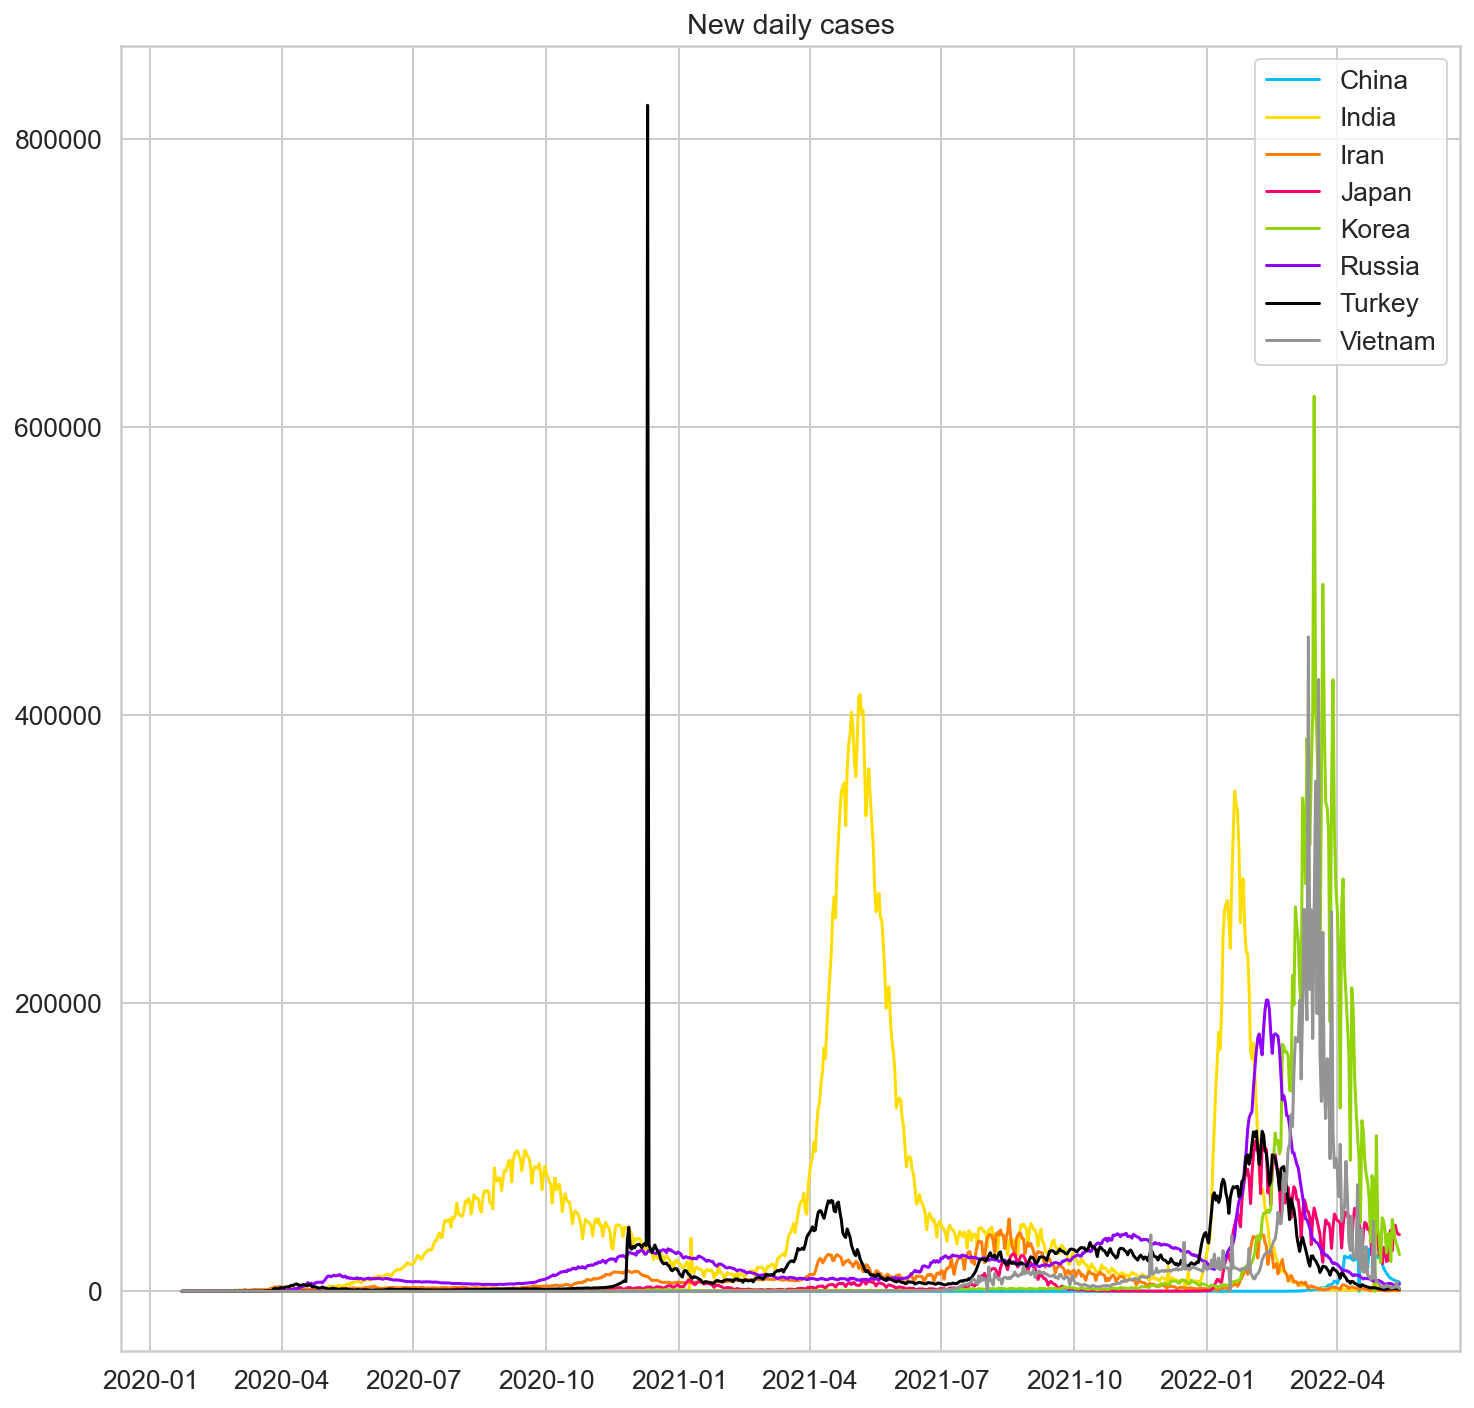

In [92]:
daily_cases_Vietnam=daily_cases_Vietnam.sum(axis=0)
daily_cases_Vietnam.index=pd.to_datetime(daily_cases_Vietnam.index)
plt.figure(figsize=(12,12))
plt.plot(daily_cases_China,label='China')
plt.plot(daily_cases_India,label='India')
plt.plot(daily_cases_Iran_,label='Iran')
plt.plot(daily_cases_Japan_,label='Japan')
plt.plot(daily_cases_Korea,label='Korea')
plt.plot(daily_cases_Russia,label='Russia')
plt.plot(daily_cases_Turkey,label='Turkey')
plt.plot(daily_cases_Vietnam,label='Vietnam')
plt.title("New daily cases");
plt.legend();